# Resonant scanner scan angle vs Applied Voltage

This is a script to create the linear plots of the resonant scanner scan angle vs the applied voltage

In [2]:
import numpy as np 
import matplotlib.pyplot as plot
import os
import scipy.optimize as opt

In [3]:
def linear(x, m, c):
    y = m*x + c
    return(y)

In [4]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [5]:
def get_r_squared(x, y_data, y_fitting):
    # This is a function used to generate the goodness of fit metric r^2.
    # This value will be used to judge the effectiveness of the curve fitting 
    # used to find the resonant frequencies of the NV centre.
    
    y_data_mean = np.mean(y_data)
    SStot = np.sum((y_data - y_data_mean)**2) # Find the variation in experimental y values.
    SSres = np.sum((y_data - y_fitting)**2) # Find the variation betweem the experimental and fitted y values. 
    
    r_squared = 1 - (SSres/SStot) # Calculate R^2
    
    return(r_squared)

C:\Users\Ryan\AppData\Local\conda\conda\envs\Ryan\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


0.9993490664456877
0.5137288464369325
0.004146137135823902


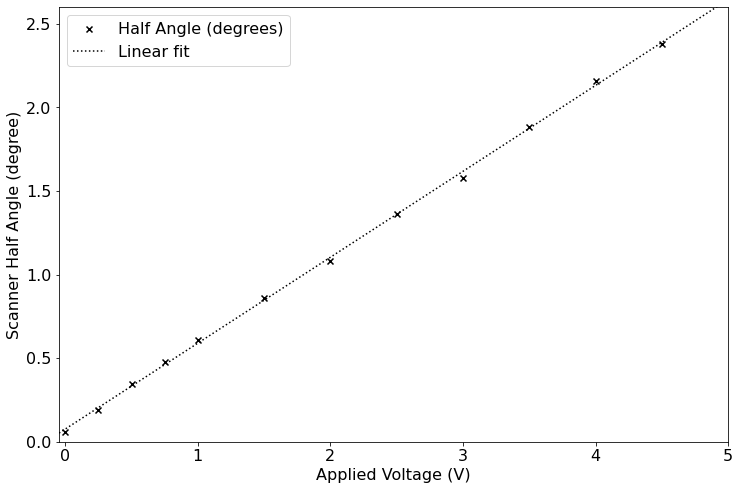

In [6]:
# Initial scan-angle plot

set_plot_params()

voltage = np.array([0.001, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3, 3.5, 4.0, 4.5])
peak_angle = np.array([0.12, 0.38, 0.69, 0.96, 1.22, 1.72, 2.16, 2.72, 3.16, 3.76, 4.32, 4.76]) 

half_angle = peak_angle/2

P0 = [0,0]
fit_params, fit_confidence = opt.curve_fit(linear, voltage, half_angle, P0)
error = np.diag(np.sqrt(fit_confidence))

fit_x = np.linspace(-0.5, 5, 100)
fit_y = linear(fit_x, fit_params[0], fit_params[1])

r_sqaured_y = linear(voltage, fit_params[0], fit_params[1])

r = get_r_squared(voltage, half_angle, r_sqaured_y)

fig, ax = plot.subplots()
plot.scatter(voltage, half_angle, marker = 'x', color = 'k', label = 'Half Angle (degrees)')
plot.plot(fit_x, fit_y, label = 'Linear fit', color = 'k', linestyle = ':')
plot.axis([-0.05, 5, 0, 2.6])
plot.legend()
plot.xlabel('Applied Voltage (V)')
plot.ylabel('Scanner Half Angle (degree)')

print(r)
print(fit_params[0])
print(error[0])

In [7]:
fig.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\Resonant_scanner\\' + 'volts_vs_scan_half_angle' + '.pdf')

C:\Users\Ryan\AppData\Local\conda\conda\envs\Ryan\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


0.9979925640466257
4.652398969193425
0.05787118358950714


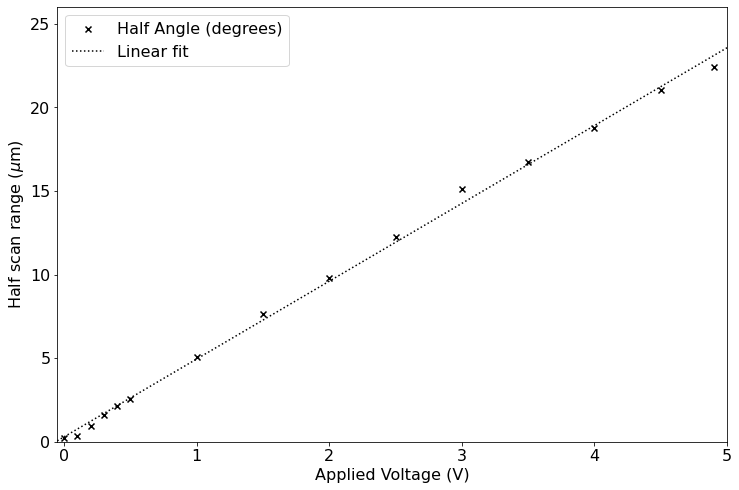

In [9]:
voltage = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4.0, 4.5, 4.9])
scan_range = np.array([0.429, 0.6438, 1.9314, 3.219, 4.292, 5.1504, 10.0862, 15.237, 
                      19.529, 24.464, 30.259, 33.477, 37.55, 42.0616, 44.8514]) 

half_scan_range = scan_range/2

P0 = [0,0]
fit_params, fit_confidence = opt.curve_fit(linear, voltage, half_scan_range, P0)
error = np.diag(np.sqrt(fit_confidence))

fit_x = np.linspace(-0.5, 5, 100)
fit_y = linear(fit_x, fit_params[0], fit_params[1])

r_sqaured_y = linear(voltage, fit_params[0], fit_params[1])

r = get_r_squared(voltage, half_scan_range, r_sqaured_y)

fig1, ax1 = plot.subplots()
plot.scatter(voltage, half_scan_range, marker = 'x', color = 'k', label = 'Half Angle (degrees)')
plot.plot(fit_x, fit_y, label = 'Linear fit', color = 'k', linestyle = ':')
plot.axis([-0.05, 5, 0, 26])
plot.legend()
plot.xlabel('Applied Voltage (V)')
plot.ylabel(r'Half scan range ($\mu$m)')

print(r)
print(fit_params[0])
print(error[0])

In [47]:
fig1.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\Resonant_scanner\\' + 'volts_v_half_scan_range' + '.pdf')

In [10]:
np.exp(-2.25)

0.10539922456186433